In [54]:
# import packages
import GEOparse
import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp
import anndata
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import scanpy.external as sce

## Mouse motor cortex dataset with all cell types

In [55]:
adata_cds = sc.read_h5ad('/Users/Joyce/Documents/COLUMBIA/COLUMBIA MS/BMEN4480/cds.h5ad')

In [56]:
adata_cds

AnnData object with n_obs × n_vars = 5666 × 31053
    obs: 'class', 'cluster', 'subclass', 'external_donor_name', 'nCount_RNA', 'nFeature_RNA'
    var: 'name'

In [57]:
# convert to dataframe
df_cds = adata_cds.to_df()

In [58]:
df_cds

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
GACCTGGAGGAATGGA-L8TX_171026_01_F03,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
GCAATCAAGTAATCCC-L8TX_171026_01_A05,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
TCTTTCCTCATGTCCC-L8TX_171026_01_G05,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCGAGAACACTCAGGC-L8TX_171026_01_F03,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TACACGATCCAGAAGG-L8TX_171026_01_D05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACCACGTG-L8TX_171026_01_G03,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
TTTGTCAGTACGCACC-L8TX_171026_01_E05,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTTACAGAA-L8TX_171026_01_H05,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TTTGTCAGTTCAGCGC-L8TX_171026_01_B05,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# remove microglia cluster
adata_cds2 = adata_cds[adata_cds.obs.subclass != 'Micro-PVM', :]

In [60]:
adata_cds2

View of AnnData object with n_obs × n_vars = 5555 × 31053
    obs: 'class', 'cluster', 'subclass', 'external_donor_name', 'nCount_RNA', 'nFeature_RNA'
    var: 'name'

In [61]:
# label batch
adata_cds2.obs['batch'] = 1

Trying to set attribute `.obs` of view, copying.


In [62]:
adata_cds2.obs

,class,cluster,subclass,external_donor_name,nCount_RNA,nFeature_RNA,batch
GACCTGGAGGAATGGA-L8TX_171026_01_F03,GABAergic,9_Lamp5,Lamp5,352353,14759.0,5238,1
GCAATCAAGTAATCCC-L8TX_171026_01_A05,GABAergic,9_Lamp5,Lamp5,352356,15335.0,5194,1
TCTTTCCTCATGTCCC-L8TX_171026_01_G05,GABAergic,9_Lamp5,Lamp5,352357,7463.0,3441,1
GCGAGAACACTCAGGC-L8TX_171026_01_F03,GABAergic,3_Lamp5 Lhx6,Lamp5,352353,8062.0,3511,1
TACACGATCCAGAAGG-L8TX_171026_01_D05,GABAergic,12_Lamp5,Lamp5,352357,7709.0,3448,1
...,...,...,...,...,...,...,...
TTTGTCACACCACGTG-L8TX_171026_01_G03,Glutamatergic,329_L6 CT CTX,L6 CT CTX,352353,18503.0,5320,1
TTTGTCAGTACGCACC-L8TX_171026_01_E05,Glutamatergic,187_L2/3 IT CTX,L2/3 IT CTX-2,352357,26422.0,6505,1
TTTGTCAGTTACAGAA-L8TX_171026_01_H05,Glutamatergic,305_L5 NP CTX,L5 NP CTX,352357,13549.0,4692,1
TTTGTCAGTTCAGCGC-L8TX_171026_01_B05,GABAergic,49_Vip,Vip,352356,13149.0,4588,1


In [63]:
# QC
sc.pp.calculate_qc_metrics(adata_cds2, percent_top=None, log1p=False, inplace=True)

In [64]:
# scale to CPM
sc.pp.normalize_total(adata_cds2, target_sum=1e6)

In [65]:
# log
sc.pp.log1p(adata_cds2)

In [66]:
# use HVGs only to make dataset smaller and easier to run
sc.pp.highly_variable_genes(adata_cds2)

In [67]:
adata_cds2

AnnData object with n_obs × n_vars = 5555 × 31053
    obs: 'class', 'cluster', 'subclass', 'external_donor_name', 'nCount_RNA', 'nFeature_RNA', 'batch', 'n_genes_by_counts', 'total_counts'
    var: 'name', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [68]:
adata_cds2 = adata_cds2[:, adata_cds2.var.highly_variable == True]

In [69]:
adata_cds2

View of AnnData object with n_obs × n_vars = 5555 × 3786
    obs: 'class', 'cluster', 'subclass', 'external_donor_name', 'nCount_RNA', 'nFeature_RNA', 'batch', 'n_genes_by_counts', 'total_counts'
    var: 'name', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [70]:
sc.pp.regress_out(adata_cds2, 'batch')

In [71]:
sc.pp.regress_out(adata_cds2, 'total_counts')

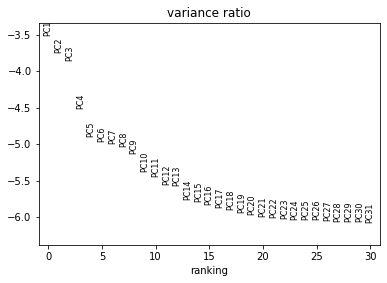

In [72]:
# PCA
sc.pp.pca(adata_cds2)

# PCA variance ratio
sc.pl.pca_variance_ratio(adata_cds2, n_pcs = 30, log = True)

In [73]:
# nearest neighbors
sc.pp.neighbors(adata_cds2, n_neighbors = 30, metric = 'manhattan')

In [74]:
# umap
sc.tl.umap(adata_cds2, min_dist=1, n_components=2)

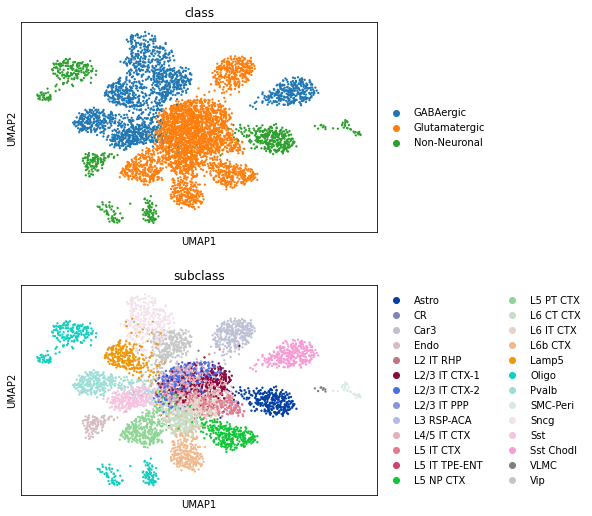

In [75]:
sc.pl.umap(adata_cds2, color=["class","subclass"],ncols=1)

## Microglia dataset

In [11]:
# read in genes by cells raw count data
adata_ctrl = sc.read_text('/Users/Joyce/Documents/COLUMBIA/COLUMBIA MS/BMEN4480/Final Project/GSE115571_RAW/GSM3182555_CTRL.txt', 
                          first_column_names = True)
adata_lps = sc.read_text('/Users/Joyce/Documents/COLUMBIA/COLUMBIA MS/BMEN4480/Final Project/GSE115571_RAW/GSM3182556_LPS.txt', 
                          first_column_names = True)

In [12]:
# transpose to cells x genes
adata_ctrl = adata_ctrl.transpose()
adata_lps = adata_lps.transpose()

In [13]:
adata_ctrl.shape

(9999, 16247)

In [14]:
adata_lps.shape

(9999, 16501)

In [15]:
# annotate as ctrl or lps
adata_ctrl.obs['group'] = 'control'
adata_lps.obs['group'] = 'lps'

In [16]:
# concatenate
adata_mg = anndata.concat([adata_ctrl,adata_lps], join = 'outer',fill_value=0)
adata_mg.obs_names_make_unique()

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [17]:
adata_mg

AnnData object with n_obs × n_vars = 19998 × 18322
    obs: 'group'

In [18]:
df_mg = adata_mg.to_df()

In [19]:
df_mg

,0610005C13Rik,0610007N19Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,n-R5s41,n-R5s43,n-R5s47,n-R5s56,n-R5s58,n-R5s69,n-R5s71,n-R5s85,n-R5s86,n-R5s88
CCCCAAACACCG,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTAACGGTCTGT,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTCAAGATACAG,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCTCTTAATATN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TGATGTTTGACT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAATGTTAGCGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACATGATCACAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCTGTCTTAAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGGACTTCCACA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# label batch
adata_mg.obs['batch'] = 0

In [21]:
adata_mg.var['mt'] = adata_mg.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata_mg, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [22]:
adata_mg.obs

,group,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
CCCCAAACACCG,control,0,5700,21827.0,355.0,1.626426
TTAACGGTCTGT,control,0,5833,22520.0,506.0,2.246892
CTCAAGATACAG,control,0,3721,11287.0,343.0,3.038894
GCTCTTAATATN,control,0,4129,11633.0,243.0,2.088885
TGATGTTTGACT,control,0,3363,9270.0,396.0,4.271845
...,...,...,...,...,...,...
AAATGTTAGCGC,lps,0,47,64.0,13.0,20.312500
ACATGATCACAG,lps,0,39,53.0,6.0,11.320755
ACCTGTCTTAAT,lps,0,58,83.0,19.0,22.891565
AGGACTTCCACA,lps,0,56,82.0,14.0,17.073172


... storing 'group' as categorical


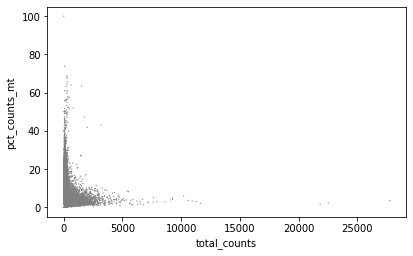

In [23]:
sc.pl.scatter(adata_mg, x='total_counts', y='pct_counts_mt')

In [24]:
# filter out cells with less than 1000 counts & genes not expressed in at least 1 cell
sc.pp.filter_cells(adata_mg, min_counts = 1000)
sc.pp.filter_genes(adata_mg, min_cells = 1)

In [25]:
adata_mg.shape

(1247, 15866)

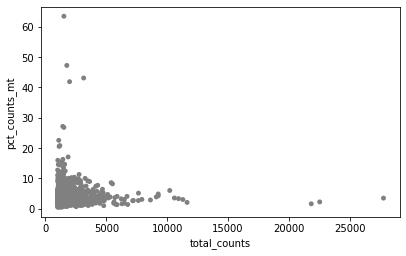

In [26]:
# remove cells with too many mitochondrial genes expressed
adata_mg.var['mt'] = adata_mg.var_names.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata_mg, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(adata_mg, x='total_counts', y='pct_counts_mt')
adata_mg = adata_mg[adata_mg.obs.pct_counts_mt < 15, :]

In [27]:
adata_mg.shape

(1234, 15866)

In [28]:
adata_mg.obs['class'] = 'Non-Neuronal'

Trying to set attribute `.obs` of view, copying.


In [29]:
mg_clusters = pd.read_csv('metadata.csv')

In [30]:
mg_clusters = mg_clusters['leiden']

In [31]:
list_mg_clusters = mg_clusters.values.tolist()

In [32]:
list_mg_clusters

['homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostatic microglia',
 'homeostati

In [33]:
adata_mg.obs['subclass'] = list_mg_clusters

In [34]:
adata_mg.obs

,group,batch,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_counts,class,subclass
CCCCAAACACCG,control,0,5700,21827.0,355.0,1.626426,21827.0,Non-Neuronal,homeostatic microglia
TTAACGGTCTGT,control,0,5833,22520.0,506.0,2.246892,22520.0,Non-Neuronal,homeostatic microglia
CTCAAGATACAG,control,0,3721,11287.0,343.0,3.038894,11287.0,Non-Neuronal,homeostatic microglia
GCTCTTAATATN,control,0,4129,11633.0,243.0,2.088885,11633.0,Non-Neuronal,homeostatic microglia
TGATGTTTGACT,control,0,3363,9270.0,396.0,4.271845,9270.0,Non-Neuronal,homeostatic microglia
...,...,...,...,...,...,...,...,...,...
GTTCTCACACGT,lps,0,1106,1783.0,52.0,2.916433,1783.0,Non-Neuronal,activated microglia
GGCTATTGACAC,lps,0,793,1140.0,42.0,3.684210,1140.0,Non-Neuronal,activated microglia
GTCGCCTTGTAT,lps,0,780,1202.0,34.0,2.828619,1202.0,Non-Neuronal,activated microglia
GAAGCCGAGCCA,lps,0,888,1232.0,19.0,1.542208,1232.0,Non-Neuronal,activated microglia


## Merge

In [35]:
# concatenate
adata = anndata.concat([adata_cds2,adata_mg], join = 'outer',fill_value=0)
adata.obs_names_make_unique()

In [36]:
adata

AnnData object with n_obs × n_vars = 6789 × 33241
    obs: 'class', 'cluster', 'subclass', 'external_donor_name', 'nCount_RNA', 'nFeature_RNA', 'batch', 'n_genes_by_counts', 'total_counts', 'group', 'total_counts_mt', 'pct_counts_mt', 'n_counts'

In [37]:
df = adata.to_df()

In [38]:
df

,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,...,n-R5s33,n-R5s40,n-R5s41,n-R5s43,n-R5s47,n-R5s58,n-R5s71,n-R5s85,n-R5s86,n-R5s88
GACCTGGAGGAATGGA-L8TX_171026_01_F03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCAATCAAGTAATCCC-L8TX_171026_01_A05,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCTTTCCTCATGTCCC-L8TX_171026_01_G05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCGAGAACACTCAGGC-L8TX_171026_01_F03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TACACGATCCAGAAGG-L8TX_171026_01_D05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTTCTCACACGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGCTATTGACAC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTCGCCTTGTAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GAAGCCGAGCCA,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
adata.obs

,class,cluster,subclass,external_donor_name,nCount_RNA,nFeature_RNA,batch,n_genes_by_counts,total_counts,group,total_counts_mt,pct_counts_mt,n_counts
GACCTGGAGGAATGGA-L8TX_171026_01_F03,GABAergic,9_Lamp5,Lamp5,352353.0,14759.0,5238.0,1,5238,14759.0,NaN,NaN,NaN,NaN
GCAATCAAGTAATCCC-L8TX_171026_01_A05,GABAergic,9_Lamp5,Lamp5,352356.0,15335.0,5194.0,1,5194,15335.0,NaN,NaN,NaN,NaN
TCTTTCCTCATGTCCC-L8TX_171026_01_G05,GABAergic,9_Lamp5,Lamp5,352357.0,7463.0,3441.0,1,3441,7463.0,NaN,NaN,NaN,NaN
GCGAGAACACTCAGGC-L8TX_171026_01_F03,GABAergic,3_Lamp5 Lhx6,Lamp5,352353.0,8062.0,3511.0,1,3511,8062.0,NaN,NaN,NaN,NaN
TACACGATCCAGAAGG-L8TX_171026_01_D05,GABAergic,12_Lamp5,Lamp5,352357.0,7709.0,3448.0,1,3448,7709.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTTCTCACACGT,Non-Neuronal,NaN,activated microglia,NaN,NaN,NaN,0,1106,1783.0,lps,52.0,2.916433,1783.0
GGCTATTGACAC,Non-Neuronal,NaN,activated microglia,NaN,NaN,NaN,0,793,1140.0,lps,42.0,3.684210,1140.0
GTCGCCTTGTAT,Non-Neuronal,NaN,activated microglia,NaN,NaN,NaN,0,780,1202.0,lps,34.0,2.828619,1202.0
GAAGCCGAGCCA,Non-Neuronal,NaN,activated microglia,NaN,NaN,NaN,0,888,1232.0,lps,19.0,1.542208,1232.0


In [40]:
# scale to CPM
sc.pp.normalize_total(adata, target_sum=1e6)

In [41]:
# log
sc.pp.log1p(adata)

In [42]:
# use HVGs only to make dataset smaller and easier to run
sc.pp.highly_variable_genes(adata)

In [43]:
adata

AnnData object with n_obs × n_vars = 6789 × 33241
    obs: 'class', 'cluster', 'subclass', 'external_donor_name', 'nCount_RNA', 'nFeature_RNA', 'batch', 'n_genes_by_counts', 'total_counts', 'group', 'total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [44]:
adata = adata[:, adata.var.highly_variable == True]

In [45]:
adata

View of AnnData object with n_obs × n_vars = 6789 × 5779
    obs: 'class', 'cluster', 'subclass', 'external_donor_name', 'nCount_RNA', 'nFeature_RNA', 'batch', 'n_genes_by_counts', 'total_counts', 'group', 'total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [46]:
sc.pp.regress_out(adata, 'batch')

/Users/Joyce/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1236: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'class' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cluster' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'subclass' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'group' as categorical


In [47]:
sc.pp.regress_out(adata, 'total_counts')

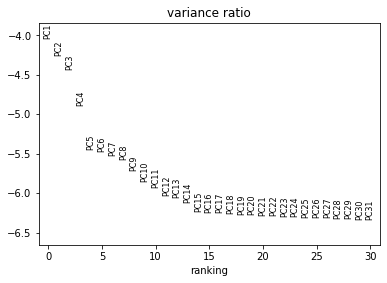

In [48]:
# PCA
sc.pp.pca(adata)

# PCA variance ratio
sc.pl.pca_variance_ratio(adata, n_pcs = 30, log = True)

In [49]:
# nearest neighbors
sc.pp.neighbors(adata, n_neighbors = 30, metric = 'manhattan')

In [50]:
# umap
sc.tl.umap(adata, min_dist=1, n_components=2)

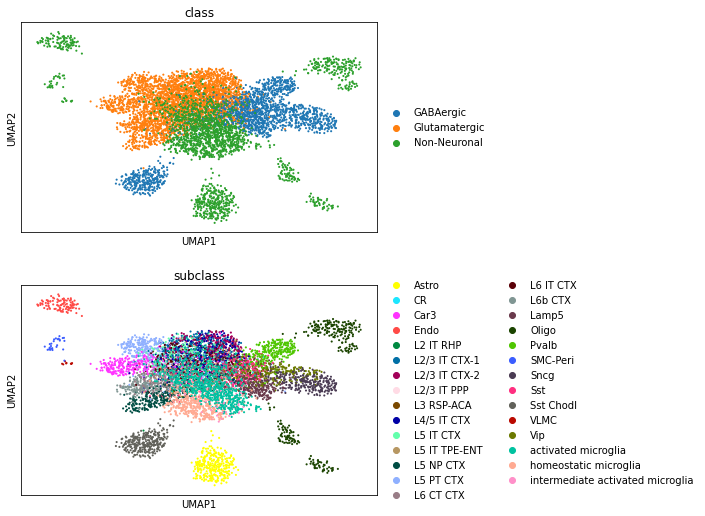

In [53]:
sc.pl.umap(adata, color=["class","subclass"],ncols=1)